# Pandas

In [3]:
import pandas as pd

Материалы:
* Макрушин С.В. "Лекция 2: Библиотека Pandas"
* https://pandas.pydata.org/docs/user_guide/index.html#
* https://pandas.pydata.org/docs/reference/index.html
* Уэс Маккини. Python и анализ данных

## Задачи для совместного разбора

1. Загрузите данные из файла `sp500hst.txt` и обозначьте столбцы в соответствии с содержимым: `"date", "ticker", "open", "high", "low", "close", "volume"`.

DataFrame - аналог двухмерного массива с гибкими индексами строк и гибкими именами столбцов.
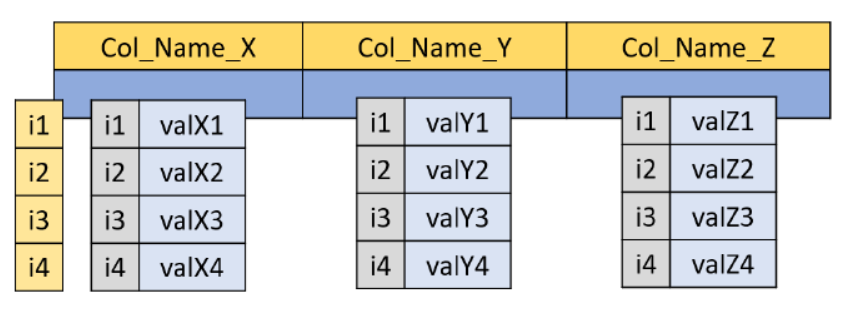



In [8]:
with open('sp500hst.txt', 'r') as file:
    lines = file.readlines()  # грузим данные из файла

# создаем список словарей
# словарь - будущая строка таблицы, где ключ - имя колонки
data = []
for line in lines:
    values = line[:-1].split(',')
    data.append({
        "date": values[0], 
        "ticker": values[1], 
        "open": values[2], 
        "high": values[3], 
        "low": values[4], 
        "close": values[5], 
        "volume": values[6]
    })
    

# создаем dataFrame используюя созданный список
df1 = pd.DataFrame(data)

# печатаем 
print(df1)

            date ticker   open     high     low  close volume
0       20090821      A   25.6    25.61   25.22  25.55  34758
1       20090824      A  25.64    25.74   25.33   25.5  22247
2       20090825      A   25.5     25.7  25.225  25.34  30891
3       20090826      A  25.32  25.6425  25.145  25.48  33334
4       20090827      A   25.5    25.57   25.23  25.54  70176
...          ...    ...    ...      ...     ...    ...    ...
122569  20100813    ZMH  51.72     51.9   51.38  51.44  14561
122570  20100816    ZMH  51.13    51.47    50.6     51  13489
122571  20100817    ZMH  51.14     51.6   50.89  51.21  20498
122572  20100819    ZMH  51.63    51.63   50.17  50.22  18259
122573  20100820    ZMH  50.03    50.55   49.48  49.82  17792

[122574 rows x 7 columns]


2. Рассчитайте среднее значение показателей для каждого из столбцов c номерами 3-6.

In [20]:
# [весь столбец, строки [3,7) ]  - не как у ndarray
# .iloc[] - неявные индексы (int location)
# .astype(float) - преобразование типа столбца
mean_values = df1.iloc[:, 2:6].astype(float).mean()
print(mean_values)
print(type(mean_values))  # тип объекта который создали

NameError: name 'df1' is not defined

3. Добавьте столбец, содержащий только число месяца, к которому относится дата.

In [10]:
# добавляем копию столбца date в справа таблицы
df1['month'] = pd.DataFrame({'month': list(df1['date'])})

# применяем ф-ю к элементам правой колонки
df1['month'] = df1['month'].apply(lambda x: x[4:6])
print(df1)

            date ticker   open     high     low  close volume month
0       20090821      A   25.6    25.61   25.22  25.55  34758    08
1       20090824      A  25.64    25.74   25.33   25.5  22247    08
2       20090825      A   25.5     25.7  25.225  25.34  30891    08
3       20090826      A  25.32  25.6425  25.145  25.48  33334    08
4       20090827      A   25.5    25.57   25.23  25.54  70176    08
...          ...    ...    ...      ...     ...    ...    ...   ...
122569  20100813    ZMH  51.72     51.9   51.38  51.44  14561    08
122570  20100816    ZMH  51.13    51.47    50.6     51  13489    08
122571  20100817    ZMH  51.14     51.6   50.89  51.21  20498    08
122572  20100819    ZMH  51.63    51.63   50.17  50.22  18259    08
122573  20100820    ZMH  50.03    50.55   49.48  49.82  17792    08

[122574 rows x 8 columns]


4. Рассчитайте суммарный объем торгов для для одинаковых значений тикеров.

In [11]:
df1['volume'] = df1['volume'].astype(int)

# позволяет сгруппировать строки в таблице на основе значений в определенном столбце
grouped = df1.groupby('ticker')
print(grouped)

# столбец сумм
sum_vol = grouped['volume'].sum()
print(sum_vol)

ticker
A        8609336
AA      81898998
AAPL    52261170
ABC      9006756
ABT     18975870
          ...   
XTO     21297931
YHOO    56837171
YUM     10971538
ZION    15551119
ZMH      4938916
Name: volume, Length: 524, dtype: int32


5. Загрузите данные из файла sp500hst.txt и обозначьте столбцы в соответствии с содержимым: "date", "ticker", "open", "high", "low", "close", "volume". Добавьте столбец с расшифровкой названия тикера, используя данные из файла `sp_data2.csv` . В случае нехватки данных об именах тикеров корректно обработать их.

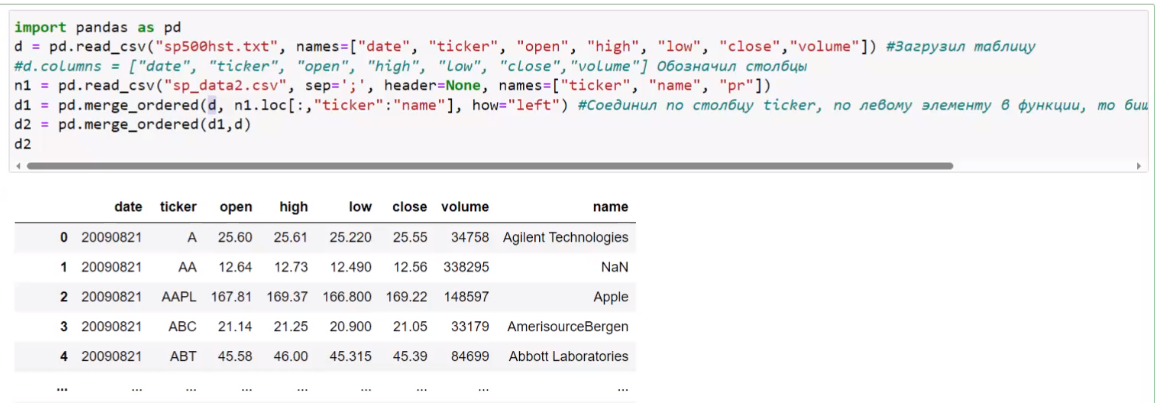


In [12]:
# загрузка txt файла формы csv в DataFrame
df_txt = pd.read_csv('sp500hst.txt', delimiter=',', names=["date", 
                                                           "ticker", 
                                                           "open", 
                                                           "high", 
                                                           "low", 
                                                           "close", 
                                                           "volume"])
print(df_txt)

            date ticker   open     high     low  close  volume
0       20090821      A  25.60  25.6100  25.220  25.55   34758
1       20090824      A  25.64  25.7400  25.330  25.50   22247
2       20090825      A  25.50  25.7000  25.225  25.34   30891
3       20090826      A  25.32  25.6425  25.145  25.48   33334
4       20090827      A  25.50  25.5700  25.230  25.54   70176
...          ...    ...    ...      ...     ...    ...     ...
122569  20100813    ZMH  51.72  51.9000  51.380  51.44   14561
122570  20100816    ZMH  51.13  51.4700  50.600  51.00   13489
122571  20100817    ZMH  51.14  51.6000  50.890  51.21   20498
122572  20100819    ZMH  51.63  51.6300  50.170  50.22   18259
122573  20100820    ZMH  50.03  50.5500  49.480  49.82   17792

[122574 rows x 7 columns]


In [13]:
import csv

# загрузка csv файла в DataFrame
df_csv = pd.read_csv('sp_data2.csv', delimiter=';', names=['ticker', 
                                                           'name', 
                                                           'percent'])
print(df_csv)

    ticker             name percent
0     AAPL            Apple    3.6%
1     AMZN       Amazon.com    3.2%
2    GOOGL         Alphabet    3.1%
3     GOOG         Alphabet    3.1%
4     MSFT        Microsoft    3.0%
..     ...              ...     ...
500    SCG            SCANA    0.0%
501    AIZ         Assurant    0.0%
502    AYI    Acuity Brands    0.0%
503    HRB        H&R Block    0.0%
504    RRC  Range Resources    0.0%

[505 rows x 3 columns]


In [20]:
# объединяем
df_merged = pd.merge(df_txt, df_csv)
print(df_merged) 

           date ticker   open     high     low  close  volume  \
0      20090821      A  25.60  25.6100  25.220  25.55   34758   
1      20090824      A  25.64  25.7400  25.330  25.50   22247   
2      20090825      A  25.50  25.7000  25.225  25.34   30891   
3      20090826      A  25.32  25.6425  25.145  25.48   33334   
4      20090827      A  25.50  25.5700  25.230  25.54   70176   
...         ...    ...    ...      ...     ...    ...     ...   
82167  20100813   ZION  20.17  20.4300  19.840  19.89   25193   
82168  20100816   ZION  19.81  19.9600  19.600  19.95   25914   
82169  20100817   ZION  20.07  20.4700  19.830  20.31   31717   
82170  20100819   ZION  19.83  20.0000  19.130  19.35   45935   
82171  20100820   ZION  19.15  19.2700  18.810  19.14   37225   

                       name percent  
0      Agilent Technologies    0.1%  
1      Agilent Technologies    0.1%  
2      Agilent Technologies    0.1%  
3      Agilent Technologies    0.1%  
4      Agilent Technologies  

## Лабораторная работа №2

### Базовые операции с `DataFrame`

## 1.1
В файлах `recipes_sample.csv` и `reviews_sample.csv` находится информация об рецептах блюд и отзывах на эти рецепты соответственно. Загрузите данные из файлов в виде `pd.DataFrame` с названиями `recipes` и `reviews`. Обратите внимание на корректное считывание столбца с индексами в таблице `reviews` (безымянный столбец).

In [22]:
import pandas as pd

# загрузка данных из файла recipes_sample.csv
recipes = pd.read_csv('recipes_sample.csv')

# загрузка данных из файла reviews_sample.csv с учетом безымянного столбца (индексов)
reviews = pd.read_csv('reviews_sample.csv', index_col=0)

print("DataFrame recipes:")
print(recipes)

print("\nDataFrame reviews:")
print(reviews)


DataFrame recipes:
                                               name      id  minutes  \
0             george s at the cove  black bean soup   44123       90   
1                healthy for them  yogurt popsicles   67664       10   
2                      i can t believe it s spinach   38798       30   
3                              italian  gut busters   35173       45   
4          love is in the air  beef fondue   sauces   84797       25   
...                                             ...     ...      ...   
29995  zurie s holey rustic olive and cheddar bread  267661       80   
29996          zwetschgenkuchen  bavarian plum cake  386977      240   
29997   zwiebelkuchen   southwest german onion cake  103312       75   
29998                                   zydeco soup  486161       60   
29999        cookies by design   cookies on a stick  298512       29   

       contributor_id   submitted  n_steps  \
0               35193  2002-10-25      NaN   
1               91970  2

## 1.2 
Для каждой из таблиц выведите основные параметры:
* количество точек данных (строк);
* количество столбцов;
* тип данных каждого столбца.

In [23]:
#  recipes
print("Основные параметры таблицы recipes:")
print("Количество точек данных (строк):", recipes.shape[0])
print("Количество столбцов:", recipes.shape[1])
print("Тип данных каждого столбца:")
print(recipes.dtypes)

#  reviews
print("\nОсновные параметры таблицы reviews:")
print("Количество точек данных (строк):", reviews.shape[0])
print("Количество столбцов:", reviews.shape[1])
print("Тип данных каждого столбца:")
print(reviews.dtypes)

Основные параметры таблицы recipes:
Количество точек данных (строк): 30000
Количество столбцов: 8
Тип данных каждого столбца:
name               object
id                  int64
minutes             int64
contributor_id      int64
submitted          object
n_steps           float64
description        object
n_ingredients     float64
dtype: object

Основные параметры таблицы reviews:
Количество точек данных (строк): 126696
Количество столбцов: 5
Тип данных каждого столбца:
user_id       int64
recipe_id     int64
date         object
rating        int64
review       object
dtype: object


## 1.3 
Исследуйте, в каких столбцах таблиц содержатся пропуски. Посчитайте долю строк, содержащих пропуски, в отношении к общему количеству строк.

In [24]:
# Расчет доли строк с пропусками в таблице recipes
recipes_rows_with_missings = recipes.isna().any(axis=1).sum()
recipes_percentage_missings = (recipes_rows_with_missings / recipes.shape[0]) * 100
print(f"\nДоля строк с пропусками в таблице recipes: {recipes_percentage_missings:}%")

# Расчет доли строк с пропусками в таблице reviews
reviews_rows_with_missings = reviews.isna().any(axis=1).sum()
reviews_percentage_missings = (reviews_rows_with_missings / reviews.shape[0]) * 100
print(f"\nДоля строк с пропусками в таблице reviews: {reviews_percentage_missings:}%")


Доля строк с пропусками в таблице recipes: 56.846666666666664%

Доля строк с пропусками в таблице reviews: 0.013417945317926377%


## 1.4 
Рассчитайте среднее значение для каждого из числовых столбцов (где это имеет смысл).

In [25]:
# выберем только числовые столбцы в таблице recipes и рассчитаем их средние значения
recipes_num_cols = recipes.select_dtypes(include=['int64', 'float64'])
recipes_mean_values = recipes_num_cols.mean()
print("Средние значения для числовых столбцов в таблице recipes:")
print(recipes_mean_values)

# выберем только числовые столбцы в таблице reviews и рассчитаем их средние значения
reviews_num_cols = reviews.select_dtypes(include=['int64', 'float64'])
reviews_mean_values = reviews_num_cols.mean()
print("\nСредние значения для числовых столбцов в таблице reviews:")
print(reviews_mean_values)

Средние значения для числовых столбцов в таблице recipes:
id                2.218793e+05
minutes           1.233581e+02
contributor_id    5.635901e+06
n_steps           9.805582e+00
n_ingredients     9.008286e+00
dtype: float64

Средние значения для числовых столбцов в таблице reviews:
user_id      1.408013e+08
recipe_id    1.600944e+05
rating       4.410802e+00
dtype: float64


## 1.5 
Создайте серию из 10 случайных названий рецептов.

In [26]:
# случайные 10 названий рецептов из DataFrame
random_recipes = recipes.sample(n=10)['name']

print("Серия из 10 случайных названий рецептов:")
print(random_recipes)

Серия из 10 случайных названий рецептов:
27628                    timely teriyaki chicken
6154      chickpea curry  vegan  pressure cooker
18021    mom s scrumptious applesauce pork chops
10926             fettuccine with mushroom sauce
8445                           crepes suzette ii
10417       eggplant  aubergine  parmesan stacks
5540                            chicken acapulco
29658         yellow melon muscatel  melon salad
15894         lemon glazed carrots and rutabagas
26630                    sweet and tangy chicken
Name: name, dtype: object


## 1.6 
Измените индекс в таблице `reviews`, пронумеровав строки, начиная с нуля.

In [27]:
new_index = pd.RangeIndex(start=0, stop=len(reviews))

reviews.index = new_index

print(reviews)

           user_id  recipe_id        date  rating  \
0            21752      57993  2003-05-01       5   
1           431813     142201  2007-09-16       5   
2           400708     252013  2008-01-10       4   
3       2001852463     404716  2017-12-11       5   
4            95810     129396  2008-03-14       5   
...            ...        ...         ...     ...   
126691     1270706     335534  2009-05-17       4   
126692     2282344       8701  2012-06-03       0   
126693      689540     222001  2008-04-08       5   
126694  2000242659     354979  2015-06-02       5   
126695      463435     415599  2010-09-30       5   

                                                   review  
0       Last week whole sides of frozen salmon fillet ...  
1       So simple and so tasty!  I used a yellow capsi...  
2       Very nice breakfast HH, easy to make and yummy...  
3       These are a favorite for the holidays and so e...  
4       Excellent soup!  The tomato flavor is just gre...  
...

In [28]:
# способ 2
reviews.reset_index(drop=True, inplace=True)
# dropbool, default False
# We can use the drop parameter to avoid the old index being added as a column:

# inplacebool, default False
# Whether to modify the DataFrame rather than creating a new one.

print(reviews)

           user_id  recipe_id        date  rating  \
0            21752      57993  2003-05-01       5   
1           431813     142201  2007-09-16       5   
2           400708     252013  2008-01-10       4   
3       2001852463     404716  2017-12-11       5   
4            95810     129396  2008-03-14       5   
...            ...        ...         ...     ...   
126691     1270706     335534  2009-05-17       4   
126692     2282344       8701  2012-06-03       0   
126693      689540     222001  2008-04-08       5   
126694  2000242659     354979  2015-06-02       5   
126695      463435     415599  2010-09-30       5   

                                                   review  
0       Last week whole sides of frozen salmon fillet ...  
1       So simple and so tasty!  I used a yellow capsi...  
2       Very nice breakfast HH, easy to make and yummy...  
3       These are a favorite for the holidays and so e...  
4       Excellent soup!  The tomato flavor is just gre...  
...

## 1.7 
Выведите информацию о рецептах, время выполнения которых не больше 20 минут и кол-во ингредиентов в которых не больше 5.

In [29]:
# фильтрация
mask = (recipes['minutes'] <= 20) & (recipes['n_ingredients'] <= 5)
print(mask)

filtered_recipes = recipes[mask]
print(filtered_recipes)

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool
                                                    name      id  minutes  \
28                                   quick biscuit bread  302399       20   
60                         peas  fit for a king or queen  303944       20   
90                     hawaiian sunrise           mimosa  100837        5   
91            tasty dish s   banana pudding in 2 minutes  286484        2   
94                                    1 minute meatballs   11361       13   
...                                                  ...     ...      ...   
29873  zip and steam red potatoes with butter and garlic  304922       13   
29874                          ziplock vanilla ice cream   74250       10   
29905                      zucchini and corn with cheese  256177       15   
29980               zucchini with jala

### Работа с датами в `pandas`

## 2.1 
Преобразуйте столбец `submitted` из таблицы `recipes` в формат времени. Модифицируйте решение задачи 1.1 так, чтобы считать столбец сразу в нужном формате.

In [30]:
# parse_dates=['submitted'] - переводит столбец в формат времени (у pd.read_csv очень очень много различных аргументов)
recipes2 = pd.read_csv('recipes_sample.csv', parse_dates=['submitted'])
recipes2.dtypes

name                      object
id                         int64
minutes                    int64
contributor_id             int64
submitted         datetime64[ns]
n_steps                  float64
description               object
n_ingredients            float64
dtype: object

## 2.2
Выведите информацию о рецептах, добавленных в датасет не позже 2010 года.

In [31]:
print(recipes2[recipes2['submitted'].dt.year <= 2010 ])

                                               name      id  minutes  \
0             george s at the cove  black bean soup   44123       90   
1                healthy for them  yogurt popsicles   67664       10   
2                      i can t believe it s spinach   38798       30   
3                              italian  gut busters   35173       45   
4          love is in the air  beef fondue   sauces   84797       25   
...                                             ...     ...      ...   
29993                     zuni caf zucchini pickles  316950     2895   
29995  zurie s holey rustic olive and cheddar bread  267661       80   
29996          zwetschgenkuchen  bavarian plum cake  386977      240   
29997   zwiebelkuchen   southwest german onion cake  103312       75   
29999        cookies by design   cookies on a stick  298512       29   

       contributor_id  submitted  n_steps  \
0               35193 2002-10-25      NaN   
1               91970 2003-07-26      NaN   


### Работа со строковыми данными в `pandas`

## 3.1  
Добавьте в таблицу `recipes` столбец `description_length`, в котором хранится длина описания рецепта из столбца `description`.

In [32]:
recipes2['description_length'] = recipes2['description'].apply(lambda x: len(str(x)))
print(recipes2)

                                               name      id  minutes  \
0             george s at the cove  black bean soup   44123       90   
1                healthy for them  yogurt popsicles   67664       10   
2                      i can t believe it s spinach   38798       30   
3                              italian  gut busters   35173       45   
4          love is in the air  beef fondue   sauces   84797       25   
...                                             ...     ...      ...   
29995  zurie s holey rustic olive and cheddar bread  267661       80   
29996          zwetschgenkuchen  bavarian plum cake  386977      240   
29997   zwiebelkuchen   southwest german onion cake  103312       75   
29998                                   zydeco soup  486161       60   
29999        cookies by design   cookies on a stick  298512       29   

       contributor_id  submitted  n_steps  \
0               35193 2002-10-25      NaN   
1               91970 2003-07-26      NaN   


## 3.2 
Измените название каждого рецепта в таблице `recipes` таким образом, чтобы каждое слово в названии начиналось с прописной буквы.

In [43]:
recipes2['name'] = recipes2['name'].str.title()
print(recipes2['name'])

0               George S At The Cove  Black Bean Soup
1                  Healthy For Them  Yogurt Popsicles
2                        I Can T Believe It S Spinach
3                                Italian  Gut Busters
4            Love Is In The Air  Beef Fondue   Sauces
                             ...                     
29995    Zurie S Holey Rustic Olive And Cheddar Bread
29996            Zwetschgenkuchen  Bavarian Plum Cake
29997     Zwiebelkuchen   Southwest German Onion Cake
29998                                     Zydeco Soup
29999          Cookies By Design   Cookies On A Stick
Name: name, Length: 30000, dtype: object


## 3.3 
Добавьте в таблицу `recipes` столбец `name_word_count`, в котором хранится количество слов из названии рецепта (считайте, что слова в названии разделяются только пробелами). Обратите внимание, что между словами может располагаться несколько пробелов подряд.

In [34]:
recipes2['name_word_count'] = recipes2['name'].apply(lambda x: len(x.split()))
print(recipes2[['name_word_count', 'name']])

       name_word_count                                          name
0                    8         george s at the cove  black bean soup
1                    5            healthy for them  yogurt popsicles
2                    7                  i can t believe it s spinach
3                    3                          italian  gut busters
4                    8      love is in the air  beef fondue   sauces
...                ...                                           ...
29995                8  zurie s holey rustic olive and cheddar bread
29996                4          zwetschgenkuchen  bavarian plum cake
29997                5   zwiebelkuchen   southwest german onion cake
29998                2                                   zydeco soup
29999                7        cookies by design   cookies on a stick

[30000 rows x 2 columns]


### Группировки таблиц `pd.DataFrame`

## 4.1 
Посчитайте количество рецептов, представленных каждым из участников (`contributor_id`). Какой участник добавил максимальное кол-во рецептов?

In [35]:
counted = recipes2.groupby('contributor_id')['name'].count()
print(counted.head())
print(f'\ncontributor_id {counted.idxmax()} : {counted.max()}')

contributor_id
1530      5
1533    186
1534     50
1535     40
1538      8
Name: name, dtype: int64

contributor_id 89831 : 421


In [46]:
# способ 2
recipes_count = recipes2['contributor_id'].value_counts()  # только интовые значения
print(recipes_count.head())

print(f'\ncontributor_id {counted.idxmax()} : {counted.max()}')

contributor_id
89831     421
37449     346
37779     345
1533      186
169430    183
Name: count, dtype: int64

contributor_id 89831 : 421


## 4.2 
Посчитайте средний рейтинг к каждому из рецептов. Для скольких рецептов отсутствуют отзывы? Обратите внимание, что отзыв с нулевым рейтингом или не заполненным текстовым описанием не считается отсутствующим.

In [37]:
import pandas as pd
# 
# загрузка данных из файла recipes_sample.csv
rec = pd.read_csv('recipes_sample.csv')

# загрузка данных из файла reviews_sample.csv с учетом безымянного столбца (индексов)
rev = pd.read_csv('reviews_sample.csv', index_col=0)

mean_rating = rev.groupby('recipe_id')['rating'].mean()
print(mean_rating)

df1_ids = set(rec['id'])  # id для рецептов из первой таблицы (есть + нет отзывы)
df2_ids = set(rev['recipe_id'])  # recipe_id для рецептов из таблицы с отзывами (id тех, у кого есть отзывы)
ids_not_in_df2 = df1_ids - df2_ids  # id у которых нет отзывов

print(len(ids_not_in_df2))  # количество элементов в множестве рецептов без id


recipe_id
48        1.000000
55        4.750000
66        4.944444
91        4.750000
94        5.000000
            ...   
536547    5.000000
536610    0.000000
536728    4.000000
536729    4.750000
536747    0.000000
Name: rating, Length: 28100, dtype: float64
1900


## 4.3   
Посчитайте количество рецептов с разбивкой по годам создания.

In [38]:
by_year = recipes2['submitted'].dt.year
print(by_year.value_counts())  # Return a Series containing counts of unique values.

submitted
2007    4429
2008    4029
2006    3473
2005    3130
2009    2963
2002    2644
2003    2334
2004    2153
2010    1538
2011     922
2012     659
2001     589
2013     490
1999     275
2014     139
2000     104
2015      42
2017      39
2016      24
2018      24
Name: count, dtype: int64


### Объединение таблиц `pd.DataFrame`

## 5.1   мое
При помощи объединения таблиц, создайте `DataFrame`, состоящий из четырех столбцов: `id`, `name`, `user_id`, `rating`. 

Рецепты, на которые не оставлен ни один отзыв, должны отсутствовать в полученной таблице. 

Подтвердите правильность работы вашего кода, выбрав рецепт, не имеющий отзывов, и попытавшись найти строку, соответствующую этому рецепту, в полученном `DataFrame`.

In [39]:
# загрузка данных из файла recipes_sample.csv
rec = pd.read_csv('recipes_sample.csv')

# загрузка данных из файла reviews_sample.csv с учетом безымянного столбца (индексов)
rev = pd.read_csv('reviews_sample.csv', index_col=0)

In [40]:
# объединение таблиц recipes и reviews по столбцу recipe_id        
# переименовываем recipe_id на по ключам
# inner - пересечение  - чтобы рецепты из rec для которых нет отзывов были удалены

merged_df = pd.merge(rec[['id', 'name']], rev[['recipe_id', 'user_id', 'rating']], left_on='id', right_on='recipe_id', how='inner')

print(merged_df)

# проверка наличия рецепта без отзывов
# находим у каких рецептов из rec нет recipe_id
df1_ids = set(rec['id'])
df2_ids = set(rev['recipe_id'])

ids_not_in_df2 = df1_ids - df2_ids
recipe_without_review_id = list(ids_not_in_df2)[0]
check_recipe = merged_df[merged_df['id'] == recipe_without_review_id]  # пытаемся найти выбранный рецепт
                                                
print(f"\nРецепт без отзывов id {recipe_without_review_id}:")
print(check_recipe)

            id                                    name  recipe_id  user_id  \
0        44123   george s at the cove  black bean soup      44123   743566   
1        44123   george s at the cove  black bean soup      44123    76503   
2        44123   george s at the cove  black bean soup      44123    34206   
3        67664      healthy for them  yogurt popsicles      67664   494084   
4        67664      healthy for them  yogurt popsicles      67664   303445   
...        ...                                     ...        ...      ...   
126691  486161                             zydeco soup     486161   305531   
126692  486161                             zydeco soup     486161  1271506   
126693  486161                             zydeco soup     486161   724631   
126694  486161                             zydeco soup     486161   133174   
126695  298512  cookies by design   cookies on a stick     298512   804234   

        rating  
0            5  
1            5  
2           

## 5.2 
При помощи объединения таблиц и группировок, создайте `DataFrame`, состоящий из трех столбцов: `recipe_id`, `name`, `review_count`, где столбец `review_count` содержит кол-во отзывов, оставленных на рецепт `recipe_id`. У рецептов, на которые не оставлен ни один отзыв, в столбце `review_count` должен быть указан 0. Подтвердите правильность работы вашего кода, выбрав рецепт, не имеющий отзывов, и найдя строку, соответствующую этому рецепту, в полученном `DataFrame`.
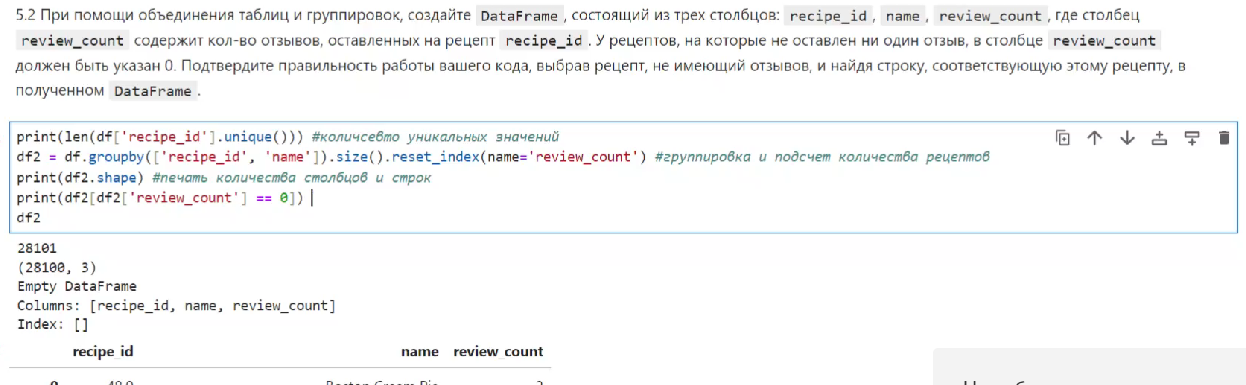
ээээээээээээээээээээээээээээээээээээээээээээээ
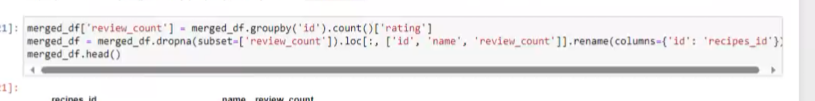

## 5.3. 
Выясните, рецепты, добавленные в каком году, имеют наименьший средний рейтинг?
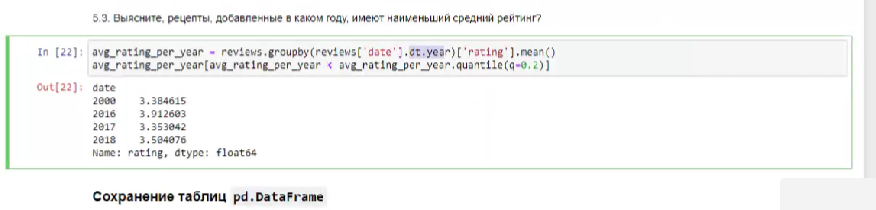
эээээээээээээээээээээээээээээээээээээээээээээ
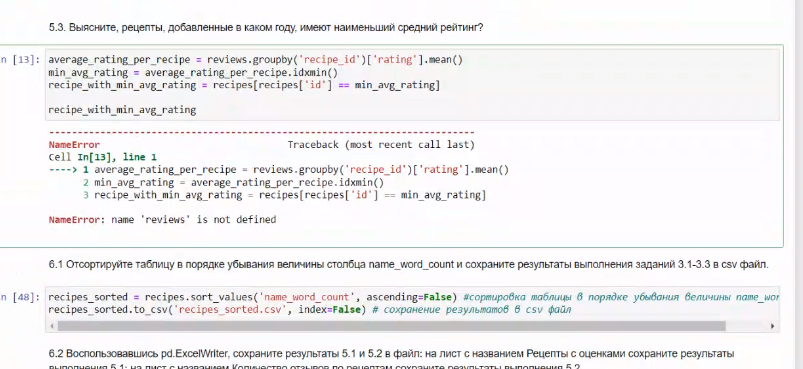
ээээээээээээээээээээээээээээээээээээээээээээ
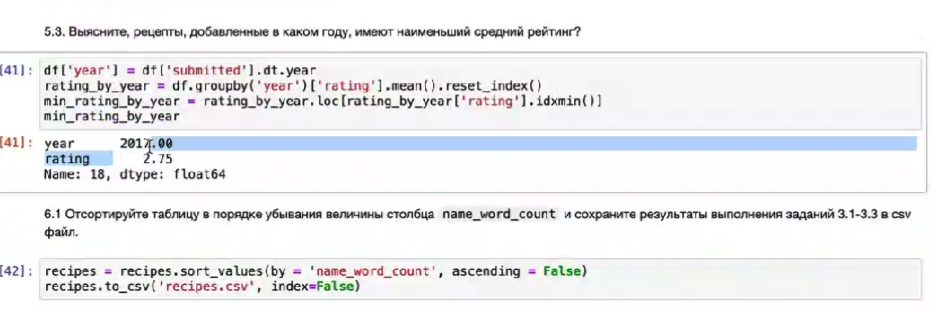

### Сохранение таблиц `pd.DataFrame`

## 6.1 
Отсортируйте таблицу в порядке убывания величины столбца `name_word_count` и сохраните результаты выполнения заданий 3.1-3.3 в csv файл. 
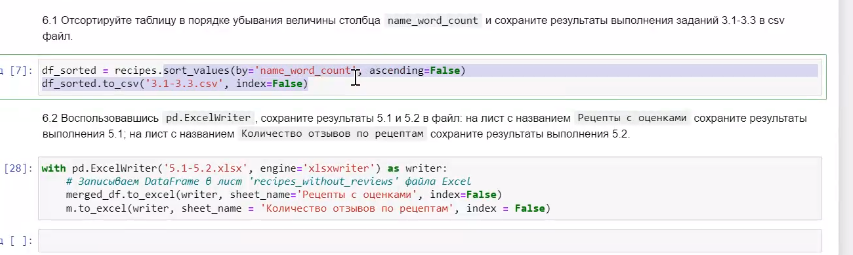

## 6.2 
Воспользовавшись `pd.ExcelWriter`, cохраните результаты 5.1 и 5.2 в файл: на лист с названием `Рецепты с оценками` сохраните результаты выполнения 5.1; на лист с названием `Количество отзывов по рецептам` сохраните результаты выполнения 5.2.